In [1]:
import pandas as pd
import numpy as np
import os
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
from matplotlib.colors import Normalize
import matplotlib.colors as mcolors
import earthpy.spatial as es
import earthpy.plot as ep

C:\Users\olive\anaconda3\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [11]:
# Get the current working directory
current_directory = os.getcwd()

# List the files and directories in the current directory
directory_contents = os.listdir(current_directory)

# Print the list
print("Files and directories in the current directory:")
for item in directory_contents:
    print(item)



import pandas as pd

# Read the Excel file into a DataFrame
#data_ffr120 = pd.read_excel('DataFFR120.xlsx')
# Now you can use 'data_ffr120' as your DataFrame

data = pd.read_csv('DATA.csv')
elevation_data = pd.read_csv('Elevation2.csv')


# Create a new DataFrame 'df' using selected columns from 'data_ffr120'
df = pd.DataFrame(data)  # Replace 'Column1', 'Column2', 'Column3' with actual column names
df_elevation = pd.DataFrame(elevation_data)

# Print the new DataFrame
print("New DataFrame:")
print(df)
print(df_elevation)


Files and directories in the current directory:
.ipynb_checkpoints
10_ACM_y60x10.kml
10_DEM_y50x10.tif
10_DEM_y50x10.zip
10_DEM_y60x10.tif
10_DEM_y60x10.zip
10_SRC_y60x10.kml
Bilder
cropped.tif
DATA.csv
DataFFR120.xlsx
Data_Projekt.ipynb
Elevation2.csv
eula_F.pdf
output.tif
Simuleringskod.ipynb
Simuleringskod_v2.ipynb
topographic.ipynb
topographic_kod-Copy1.ipynb
topographic_kod.ipynb
New DataFrame:
         Unnamed: 0       id         left          top        right  \
0                 0        1  555659.6685  6629119.337  555672.1685   
1                 1        2  555659.6685  6629106.837  555672.1685   
2                 2        3  555659.6685  6629094.337  555672.1685   
3                 3        4  555659.6685  6629081.837  555672.1685   
4                 4        5  555659.6685  6629069.337  555672.1685   
...             ...      ...          ...          ...          ...   
2280955     2280955  2280956  577922.1685  6613181.837  577934.6685   
2280956     2280956  2280957 

In [12]:
# Choose specific columns from 'data_ffr120'
selected_columns = ['left', 'top']  # Replace with the actual column names you want to select
coordinates_df = data[selected_columns]

# Create a grid by taking the Cartesian product of longitude and latitude values
longitude_values = coordinates_df['left'].unique()
latitude_values = coordinates_df['top'].unique()
print(len(latitude_values))
print(len(longitude_values))


1280
1782


# Define grid and read all different parameters into their own separate grids

In [85]:
volymmean = data['volume_mean']
elevationmean = df_elevation['elevationmean']
Markfuktighetmean = data ['Markfuktighetmean']


# Replace NaN values with zero
volymmean.fillna(0, inplace=True)
elevationmean.fillna(0, inplace=True)
Markfuktighetmean.fillna(0, inplace=True)


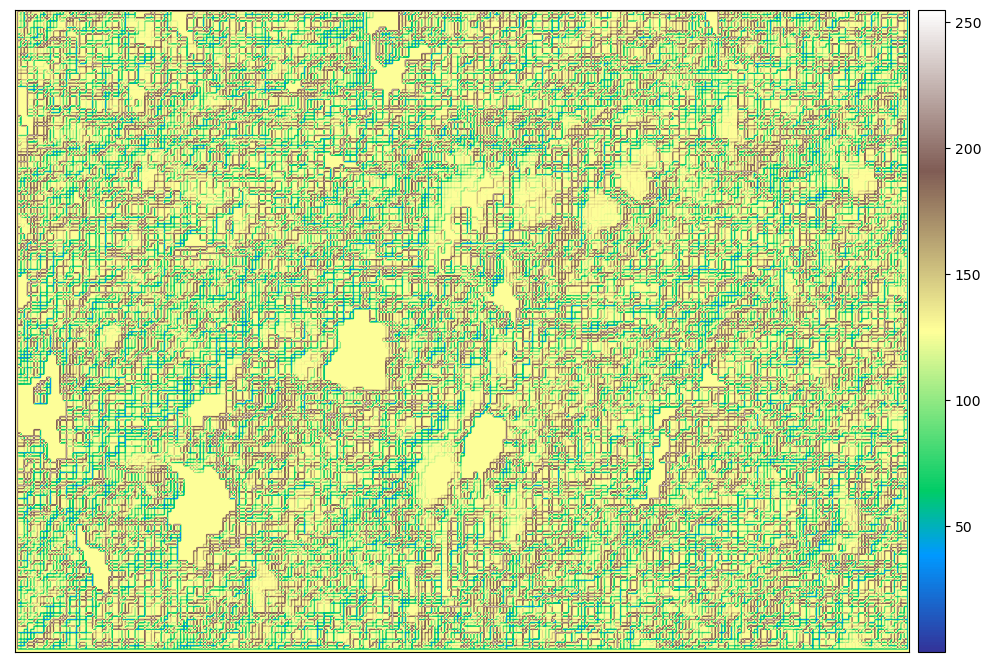

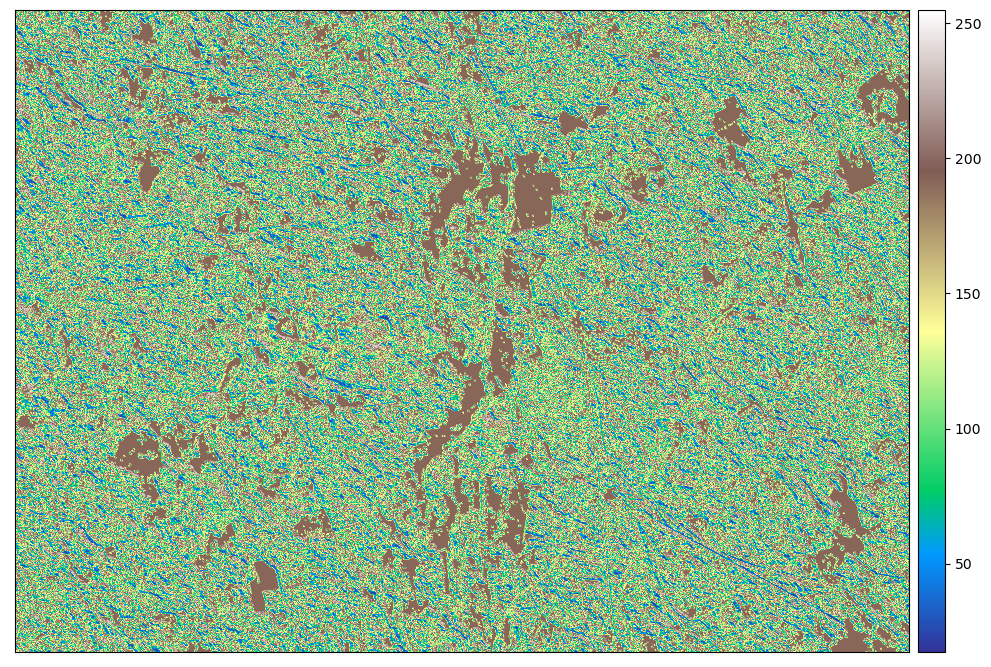

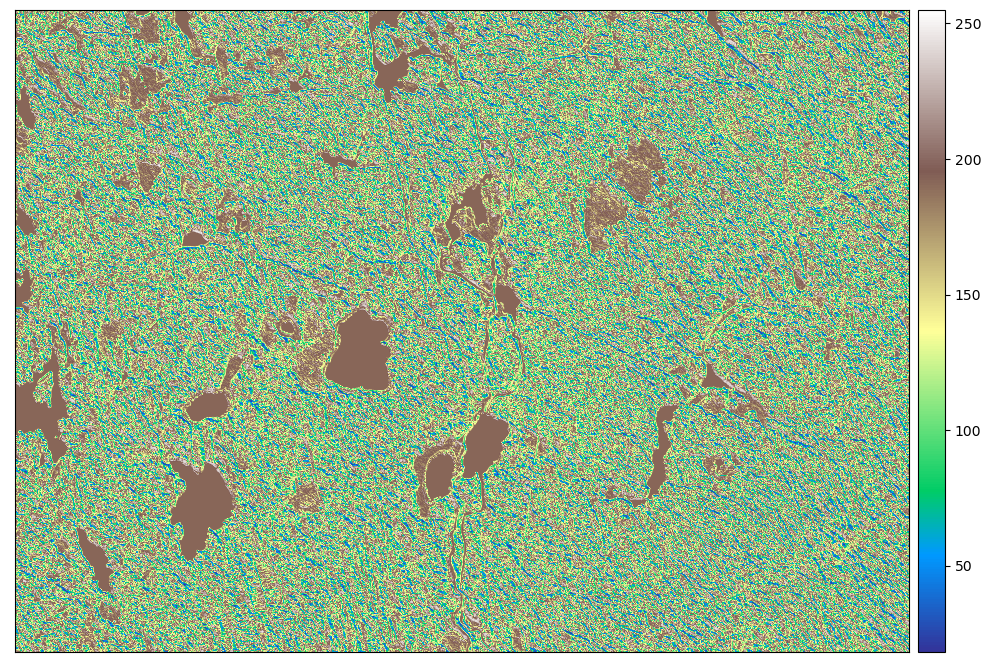

<Figure size 1500x1500 with 0 Axes>

In [87]:
grid = np.zeros((len(latitude_values), len(longitude_values))) #Create base grid


count=0


for j in range(grid.shape[1]):
    for i in range(grid.shape[0]):            
            Volumemean_grid[i,j] = volymmean[count]
            Elevationmean_grid[i,j] = elevationmean[count]
            Moisture_grid[i,j] = Markfuktighetmean[count]
            count+=1

            
hillshade1 = es.hillshade(Elevationmean_grid, azimuth=315, altitude=0)
hillshade2 = es.hillshade(Volumemean_grid)
hillshade3 = es.hillshade(Moisture_grid)
ep.plot_bands(hillshade1, cmap='terrain')
ep.plot_bands(hillshade2, cmap='terrain')
ep.plot_bands(hillshade3, cmap='terrain')
plt.figure(figsize=(15,15))


plt.show()

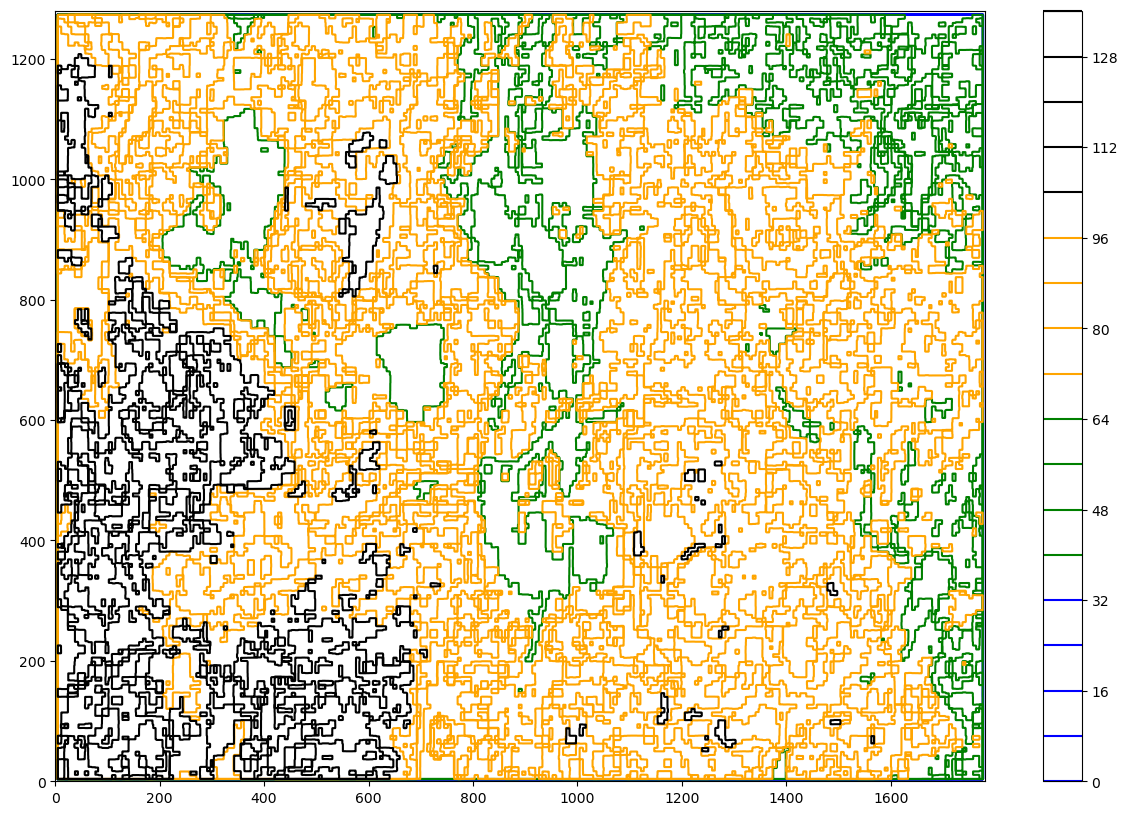

In [83]:
# Example for contour plots
fig, axs = plt.subplots(1, figsize=(15, 10))

# Plot contour plots for each grid
#contour1 = axs[0].contour(Volumemean_grid, cmap=cmap)
#axs[0].set_title('Volumemean_grid')
contour_levels = 20
contour2 = axs.contour(Elevationmean_grid, levels = contour_levels ,cmap=cmap)
#axs[1].set_title('Elevationmean_grid')

#contour3 = axs[2].contour(Moisture_grid, cmap=cmap)
#axs[2].set_title('Moisture_grid')

# Add colorbars
#fig.colorbar(contour1, ax=axs[0])
fig.colorbar(contour2, ax=axs)
#fig.colorbar(contour3, ax=axs[2])

plt.show()


# Define lake array

In [50]:
flattened_arr = Moisture_grid.flatten()
unique_elements, counts = np.unique(flattened_arr, return_counts=True)
counts_dict = {}
for elevation, count in zip(unique_elements, counts):
    if elevation not in counts_dict:
        counts_dict[elevation] = [count]
    else:
        counts_dict[elevation].append(count)
        
df = pd.DataFrame.from_dict(counts_dict, orient='index').reset_index()
df.sort_values(by=0,ascending = False)

result_series = df[df[0] > 2000]['index']

# Convert the resulting pandas Series to a NumPy array
lake_array = result_series.to_numpy()

# Print the result


[0.00000000e+00 2.38095238e-02 2.77777778e-02 4.76190476e-02
 5.55555556e-02 8.33333333e-02 1.11111111e-01 1.38888889e-01
 1.66666667e-01 1.94444444e-01 2.22222222e-01 2.50000000e-01
 2.77777778e-01 3.05555556e-01 3.33333333e-01 3.61111111e-01
 3.88888889e-01 4.44444444e-01 4.72222222e-01 5.00000000e-01
 5.27777778e-01 5.55555556e-01 5.83333333e-01 6.11111111e-01
 6.38888889e-01 6.66666667e-01 6.94444444e-01 7.22222222e-01
 7.50000000e-01 7.77777778e-01 8.05555556e-01 8.33333333e-01
 8.61111111e-01 8.88888889e-01 9.16666667e-01 9.44444444e-01
 9.72222222e-01 1.00000000e+00 1.02777778e+00 1.05555556e+00
 1.08333333e+00 1.11111111e+00 1.13888889e+00 1.16666667e+00
 1.19444444e+00 1.25000000e+00 1.33333333e+00 1.50000000e+00
 1.66666667e+00 1.83333333e+00 2.00000000e+00 2.16666667e+00
 2.33333333e+00 2.50000000e+00 9.86666667e+01 9.88333333e+01
 9.88611111e+01 9.88888889e+01 9.89166667e+01 9.89444444e+01
 9.89722222e+01 9.90000000e+01 9.90277778e+01 9.90555556e+01
 9.90833333e+01 9.911111

In [ ]:
# Constants and parameters
grid = np.zeros((len(latitude_values), len(longitude_values))) #Create base grid
grid_size = (grid.shape)
nTimeSteps = 500
windDirection = 90*3 * np.pi / 180
dt = 0.5
windSpeed = 20
fireSpeed = 1
Ks = 0.5
slope = 0 * np.pi / 180
slopeDirection = 0
cmap = mcolors.ListedColormap(['blue', 'green', 'orange', 'black']) #0 , #1, #2, # 3


# Define vegetation types with associated properties
vegetation_types = {
    0: {'fuel_consumption_rate': 0, 'moisture': 0},
    2: {'fuel_consumption_rate': 0.2, 'moisture': 0.3, 'b1': 0.1, 'b2': 0.5},
    1: {'fuel_consumption_rate': 0.5, 'moisture': 0.2, 'b1': 0.2, 'b2': 0.6},
}

class_codes = [1, 2, 3] #{'trees': 1, 'grass': 2, 'water': 3}



class_grid = np.full(grid_size, class_codes[0], dtype='object') #Only trees

# Create an elevation grid with a river
elevation_grid = Elevationmean_grid
hillshade = es.hillshade(elevation_grid, azimuth=315, altitude=0) #Used for plotting
forestdensity_grid = Volumemean_grid

# Find indices where elevation_grid is equal to 0
#zero_elevation_indices = np.where(elevation_grid == 0)

# Set corresponding values in forestdensity_grid to 0
#forestdensity_grid[zero_elevation_indices] = 0

Moisture_grid_norm = Moisture_grid/np.max(Moisture_grid)
Volumemean_grid_norm = Volumemean_grid/np.max(Volumemean_grid)
Ks_grid = (Moisture_grid_norm+Volumemean_grid_norm)/2

print(Ks_grid)
print(np.mean(Ks_grid))



for i in range(grid.shape[0]):
        for j in range(grid.shape[1]):
            if Moisture_grid[i,j] not in lake_array:
                vegetation_cell = class_grid[i,j]
                if vegetation_cell in vegetation_types:
                    grid[i,j] = 1


                
# Set the ignition point at the center of the grid
ignition_point = (grid_size[0] // 2, grid_size[1] // 2)
grid[ignition_point] = 2  # 2 represents a burning cell

In [88]:
# Calculate wind vector components
u = windSpeed * np.cos(windDirection+np.pi)
v = windSpeed * np.sin(windDirection+np.pi)
# Main loop
for step in tqdm(range(1, nTimeSteps + 1), desc="Simulation Progress"):
    # Create arrays to store the updated grid
    new_grid = grid.copy()
               
    # Update the grid for fire spread
    for i in (range(grid_size[0])):
        for j in range(grid_size[1]):
            """"cell = grid[i, j]
            vegetation_cell = class_grid[i, j]
            v_type = vegetation_types[vegetation_cell]
            if vegetation_cell in vegetation_types:  # If the cell has vegetation

                if cell == 2:  # If the cell is on fire
                    # Calculate the probability of fire extinction
                    pE = v_type['fuel_consumption_rate'] * (
                            1 / (np.exp(-v_type['b1'] * v_type['moisture']) * v_type['b2'] ** 2)
                    )
                    pE = 0.01
                    if np.random.random() < pE:
                        new_grid[i, j] = 3  # 3 represents a cell that was previously on fire and cannot catch fire again"""

            if grid[i,j] == 2:

                a_choices = [1, 2, 3, 4]
                a_weights = [0.8, 0.15, 0.04, 0.01]
                a = np.random.choice(a_choices, p=a_weights)
                # Create a box around the current cell (centered at the current cell)
                box_radius = a 
                i_min, i_max = max(0, i - box_radius), min(grid_size[0], i + box_radius + 1)
                j_min, j_max = max(0, j - box_radius), min(grid_size[1], j + box_radius + 1)
                fire_indices = np.where(grid[i_min:i_max, j_min:j_max] == 1)
                if len(fire_indices[0]) >0:
                    for neighbor_i, neighbor_j in zip(fire_indices[0], fire_indices[1]):
                        # Calculate the absolute indices of the neighbors
                        neighbor_i_absolute, neighbor_j_absolute = i_min + neighbor_i, j_min + neighbor_j

                        # Check if the neighbor is within the bounds of the grid
                        if 0 <= neighbor_i_absolute < grid_size[0] and 0 <= neighbor_j_absolute < grid_size[1]:
                            if grid[neighbor_i_absolute, neighbor_j_absolute] == 1:
                                # Spread the fire to the neighbor based on the same logic as before
                                elev_diff = elevation_grid[i, j] - elevation_grid[neighbor_i_absolute, neighbor_j_absolute]
                                slope=arctan2(elev_diff[1]/elev_diff[0])
                                if -5 <= elev_diff <= 5:  # You can adjust this threshold as needed
                                    Ks= Ks_grid[i,j]
                                    nu = np.arctan2(i - neighbor_i_absolute, j - neighbor_j_absolute) - slopeDirection
                                    if nu < 0:
                                        nu += 2 * np.pi

                                    if (0 < nu < np.pi / 2) or (3 * np.pi / 2 < nu < 2 * np.pi):
                                        fireSpread = fireSpeed * Ks * np.exp(
                                            3.533 * (np.tan(slope) * np.cos(nu)) ** 1.2 * np.cos(nu)
                                        ) * np.exp(0.1783 * windSpeed * np.cos(nu - windDirection))
                                    else:
                                        fireSpread = fireSpeed * Ks * np.exp(
                                            3.533 * (np.tan(slope) * np.cos(nu)) ** 1.2 * np.cos(nu)
                                        ) * np.exp(0.1783 * windSpeed * np.cos(nu - windDirection))

                                    # Ignite the neighbor based on a random probability
                                    if np.random.random() < fireSpread * dt:
                                        new_grid[neighbor_i_absolute, neighbor_j_absolute] = 2  # 2 represents a burning cell

    grid = new_grid
    if np.mod(step, 1) == 0:
        # Consolidated plotting
        clear_output(wait=True)
        fig, axes = plt.subplots(4,1, figsize=(30, 30))  # Add an additional subplot
        norm = Normalize(vmin=0, vmax=3)

        # Plot the first subplot
        axes[0].imshow(grid, cmap=cmap, norm=norm)
        axes[0].set_title(f'Time Step {step}/{nTimeSteps}, Trees on fire: {np.count_nonzero(grid == 2)}')
        middle_x, middle_y = grid_size[1] // 2, grid_size[0] // 2
        axes[0].arrow(middle_x, middle_y, u, v, color='blue', width=1, head_width=11, head_length=3)

        # Plot the second subplot (hillshade)
        axes[1].imshow(hillshade, cmap='terrain')
        axes[1].set_title(f'Elevation Grid')

        # Plot the third subplot (transparent grid overlay)
        axes[2].imshow(hillshade, cmap='terrain')  # Use hillshade as the background
        axes[2].imshow(grid, cmap=cmap, norm=norm, alpha=0.5)  # Overlay grid with transparency
        axes[2].set_title('Transparent Grid Overlay')
        axes[3].imshow(grid, cmap='binary')

        plt.show()

    """"if np.mod(step, 1) == 0:
        # Consolidated plotting
        clear_output(wait=True)
        fig, axes = plt.subplots(1, 2, figsize=(12, 5))
        norm = Normalize(vmin=0, vmax=3)
        # Plot the first subplot
        axes[0].imshow(grid, cmap=cmap, norm=norm)
        axes[0].set_title(f'Time Step {step}/{nTimeSteps}, Trees on fire: {np.count_nonzero(grid == 2)}')
        middle_x, middle_y = grid_size[1] // 2, grid_size[0] // 2
        axes[0].arrow(middle_x, middle_y, u, v, color='blue', width=1, head_width=11, head_length=3)

        # Plot the second subplot (you can customize this as needed)
        axes[1].imshow(hillshade,  cmap='terrain')
        axes[1].set_title(f'Elevation Grid')
        plt.show()"""


Simulation Progress:   0%|                                                             | 1/500 [00:05<47:37,  5.73s/it]


KeyboardInterrupt: 